<img style="float: left; height: 175px; width: 175px" src="../landlab_logo_picture.jpg"> <h3 style="margin: 117px 0 0 185px; font-weight: 300;">a toolkit for modeling earth surface processes</h3>

# Setting Boundary Conditions on a Voronoi.

<hr>
<small> For instructions on how to run an interactive iPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/release/README.md">https://github.com/landlab/tutorials/blob/release/README.md</a></small><br>
<small>For more Landlab tutorials, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

### This tutorial illustrates how to modify the boundary conditions on a voronoi grid.

In [1]:
from landlab import VoronoiDelaunayGrid, CLOSED_BOUNDARY, FIXED_GRADIENT_BOUNDARY, \
FIXED_VALUE_BOUNDARY
from landlab.plot.imshow import imshow_grid
import numpy as np
%matplotlib inline

- Instantiate a grid.

In [2]:
x, y = np.random.rand(25), np.random.rand(25) 
vg = VoronoiDelaunayGrid(x, y)

The node boundary condition options are:

- CORE_NODE (status value = 0; all operations are performed on a CORE_NODE)
- FIXED_VALUE_BOUNDARY (status value = 1; a boundary node with a fixed value)
- FIXED_GRADIENT_BOUNDARY (status value = 2; a boundary node with a fixed gradient)
- TRACKS_CELL_BOUNDARY (status value = 3; a boundary node that is wrap-around)
- CLOSED_BOUNDARY (status value = 4; closed boundary, or no flux can cross this node, or more accurately, can cross the faces around the node)

(Note that these options are designed for the convenience in writing Landlab applications, and  are not "automatically enforced" in internal Landlab functions. For example, if you add two node fields together, as in `my_field1 + my_field2`, *all* values will be added, not just core nodes; to take advantage of boundary coding, you would use a syntax like `my_field1[grid.core_nodes] + my_field2[grid.core_nodes]`.)

Check the status of boundaries immediately after instantiating the grid:

In [3]:
vg.status_at_node

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=uint8)

The default conditions are for the perimeter to be fixed value (status of 1) and the interior nodes to be core (status of 0).

This is not actually much easier to see graphically, because the perimeter nodes are not colored.  Note that they have a value of 1, so it seems they should be shown as purple, but the plotter does not color them because they don't have a defined cell size.

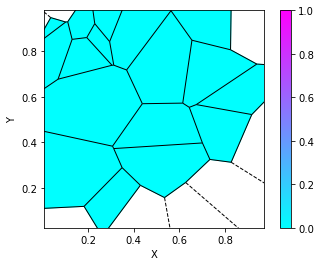

In [4]:
imshow_grid(vg, vg.status_at_node, show_elements=True, cmap='cool')

Now suppose we want closed nodes on the boundary, instead of fixed value nodes.

We can change this by accessing the nodes that are currently fixed value and changing their status.

array([4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 4], dtype=uint8)

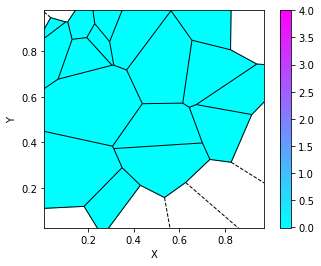

In [5]:
vg.status_at_node[vg.status_at_node == FIXED_VALUE_BOUNDARY] = CLOSED_BOUNDARY
imshow_grid(vg, vg.status_at_node, show_elements=True, cmap='cool', limits =(-0.01,4), 
            color_for_closed='red')
vg.status_at_node

Now all of the nodes that had a status value of 1 have a status value of 4, but again viewing this graphically is not very helpful.  The array values have appropriately changed.

Now let's instantiate a new grid and give it some elevation values.  In this case any node that has an x value < 0.5 will have an elevation of -1.  Othewise, the nodes have a value of 1.

In [6]:
x, y = np.random.rand(25), np.random.rand(25) 
vg2 = VoronoiDelaunayGrid(x, y)
vg2.add_ones('node','topographic__elevation')
vg2.at_node['topographic__elevation'][vg2.x_of_node < 0.5] = -1.

Illustrate the topography and show the values.

array([-1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.])

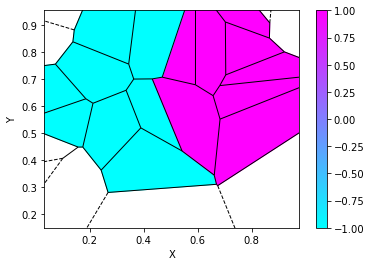

In [7]:
imshow_grid(vg2, vg2.at_node['topographic__elevation'], show_elements=True, 
            cmap='cool')
vg2.at_node['topographic__elevation']

Now we can illustrate the grid and see at least some of the closed elements by using the imshow_grid option color_for_closed.  Again remember that some of the nodes that are plotting in white areas are closed as well - that is, the ones that have an x value less than 0.5 are closed.

array([4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 1,
       0, 1], dtype=uint8)

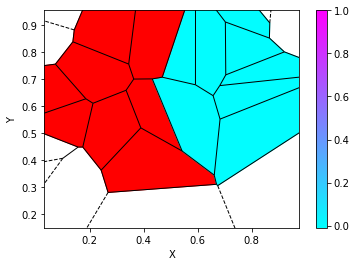

In [8]:
vg2.set_nodata_nodes_to_closed(vg2.at_node['topographic__elevation'], -1.)
imshow_grid(vg2, vg2.status_at_node, show_elements=True, color_for_closed='red', 
            cmap='cool', limits = (-0.01,1))
vg2.status_at_node

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>